# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
crypto_count = {
    'volume': [1.2,5.3]
}

tickers = ['btc','eth']

df_crypto = pd.DataFrame(crypto_count, index=tickers)
my_btc = df_crypto['volume'].iloc[0]
my_eth = df_crypto['volume'].iloc[1]

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

The current value of your 1.2 BTC is $58,785.60
The current value of your 5.3 ETH is $17,172.05


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [8]:
# Format current date as ISO format
from datetime import datetime, timedelta
N = 1000
today = pd.Timestamp(datetime.now()).isoformat()
end_date = pd.Timestamp((datetime.now() - timedelta(days=N))).isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca_api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=end_date,
    limit=N
).df

# Preview DataFrame
df_ticker

AGG                                         \
                             open     high       low    close     volume   
2017-09-07 00:00:00-04:00  110.43  110.660  110.4200  110.580  1526058.0   
2017-09-08 00:00:00-04:00  110.54  110.580  110.4300  110.430  2004746.0   
2017-09-11 00:00:00-04:00  110.27  110.290  110.1000  110.140  1986181.0   
2017-09-12 00:00:00-04:00  110.04  110.060  109.9200  109.980  1827871.0   
2017-09-13 00:00:00-04:00  110.00  110.040  109.8600  109.860  1125316.0   
...                           ...      ...       ...      ...        ...   
2021-08-23 00:00:00-04:00  116.09  116.180  116.0400  116.175  5580303.0   
2021-08-24 00:00:00-04:00  116.08  116.140  115.9600  115.980  4421916.0   
2021-08-25 00:00:00-04:00  115.99  116.011  115.6810  115.760  5204036.0   
2021-08-26 00:00:00-04:00  115.76  115.790  115.6444  115.785  4730638.0   
2021-08-27 00:00:00-04:00  115.81  116.100  115.7146  116.100  5361646.0   

                              SPY                                         
                             open     high       low   close      volume  
2017-09-07 00:00:00-04:00     NaN      NaN       NaN     NaN         NaN  
2017-09-08 00:00:00-04:00  246.53  247.110  246.3000  246.55  39326387.0  
2017-09-11 00:00:00-04:00  248.04  249.300  248.0200  249.17  48756933.0  
2017-09-12 00:00:00-04:00  249.63  250.070  249.4200  250.07  42765330.0  
2017-09-13 00:00:00-04:00  249.73  250.210  249.5900  250.18  30812116.0  
...                           ...      ...       ...     ...         ...  
2021-08-23 00:00:00-04:00  445.16  448.230  443.4355  447.26  49349485.0  
2021-08-24 00:00:00-04:00  447.97  448.540  447.4200  447.95  33180117.0  
2021-08-25 00:00:00-04:00  448.17  449.457  447.7700  448.88  35262175.0  
2021-08-26 00:00:00-04:00  448.61  448.860  446.1600  446.27  53455704.0  
2021-08-27 00:00:00-04:00  447.12  450.650  447.0600  450.19  54848833.0  

[1001 rows x 10 columns]

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker['AGG']['close'].iloc[-1]
spy_close_price = df_ticker['SPY']['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.1
Current SPY closing price: $450.19


In [10]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $22,509.50
The current value of your 200 AGG shares is $23,220.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crytpo = my_btc_value + my_eth_value
total_ticker = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame(columns=['amount'], index=['crypto', 'shares'])
df_savings.iloc[0] = total_crytpo
df_savings.iloc[1] = total_ticker

# Display savings DataFrame
display(df_savings)

,amount
crypto,75957.7
shares,45729.5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014592461850>],
      dtype=object)

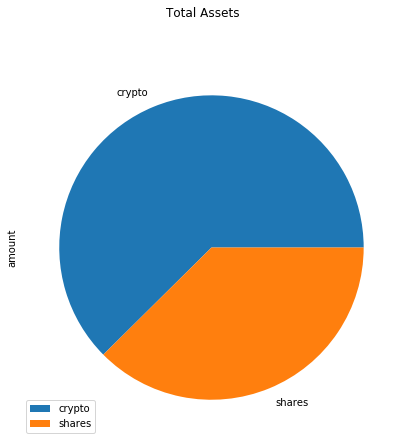

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True, figsize=(10,7), title='Total Assets')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
savings_percentage = total_savings/emergency_fund
def saving_health(emergency, savings):
    if emergency_fund < total_savings:
        print(f'Keep it up, your portfolio is valued at {savings_percentage:.0%} your total savings goal!')
    elif emergency_fund == total_savings:
        print(f'Congrats! you have {savings_percentage:.0%} your total savings goal!')
    else:
        print(f'WARNING! Your current potfolio balance is only {savings_percentage:.0%} your total savings goal')
saving_health(emergency_fund,total_savings)

Keep it up, your portfolio is valued at 338% your total savings goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = df_ticker.dropna()
weights = [.40, .60]

# Display sample data
df_stock_data.head()


AGG                                        SPY  \
                             open    high     low   close     volume    open   
2017-09-08 00:00:00-04:00  110.54  110.58  110.43  110.43  2004746.0  246.53   
2017-09-11 00:00:00-04:00  110.27  110.29  110.10  110.14  1986181.0  248.04   
2017-09-12 00:00:00-04:00  110.04  110.06  109.92  109.98  1827871.0  249.63   
2017-09-13 00:00:00-04:00  110.00  110.04  109.86  109.86  1125316.0  249.73   
2017-09-14 00:00:00-04:00  109.81  109.97  109.81  109.93  1485053.0  249.79   

                                                               
                             high     low   close      volume  
2017-09-08 00:00:00-04:00  247.11  246.30  246.55  39326387.0  
2017-09-11 00:00:00-04:00  249.30  248.02  249.17  48756933.0  
2017-09-12 00:00:00-04:00  250.07  249.42  250.07  42765330.0  
2017-09-13 00:00:00-04:00  250.21  249.59  250.18  30812116.0  
2017-09-14 00:00:00-04:00  250.32  249.60  250.10  40831958.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_30.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2017-09-08 00:00:00-04:00  110.54  110.58  110.43  110.43  2004746.0   
2017-09-11 00:00:00-04:00  110.27  110.29  110.10  110.14  1986181.0   
2017-09-12 00:00:00-04:00  110.04  110.06  109.92  109.98  1827871.0   
2017-09-13 00:00:00-04:00  110.00  110.04  109.86  109.86  1125316.0   
2017-09-14 00:00:00-04:00  109.81  109.97  109.81  109.93  1485053.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2017-09-08 00:00:00-04:00          NaN  246.53  247.11  246.30  246.55   
2017-09-11 00:00:00-04:00    -0.002626  248.04  249.30  248.02  249.17   
2017-09-12 00:00:00-04:00    -0.001453  249.63  250.07  249.42  250.07   
2017-09-13 00:00:00-04:00    -0.001091  249.73  250.21  249.59  250.18   
2017-09-14 00:00:00-04:00     0.000637  249.79  250.32  249.60  250.10   

                                                    
                               volume daily_return  
2017-09-08 00:00:00-04:00  39326387.0          NaN  
2017-09-11 00:00:00-04:00  48756933.0     0.010627  
2017-09-12 00:00:00-04:00  42765330.0     0.003612  
2017-09-13 00:00:00-04:00  30812116.0     0.000440  
2017-09-14 00:00:00-04:00  40831958.0    -0.000320

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000949,1.017199,0.997908,1.000533,1.000069,0.991779,1.011989,1.008619,1.006122,0.986207,...,1.009790,0.993170,0.986854,0.995208,0.995332,0.999638,0.997805,1.005534,1.014120,1.006382
2,1.003261,1.016871,1.011676,1.002769,0.993267,1.002806,1.022259,1.018951,1.016499,0.973147,...,1.002882,0.997706,0.985425,0.996453,1.000889,0.989814,0.983331,0.991337,1.014693,0.994800
3,0.989297,1.015336,1.010564,1.013956,1.006522,1.005694,1.012422,1.021590,1.020815,0.966609,...,0.993900,0.991477,0.986494,0.995016,1.000378,0.983195,0.981644,0.982702,1.027921,0.990258
4,0.992332,1.031794,1.002028,1.028637,1.004200,1.004254,1.033035,1.033309,1.011832,0.969474,...,0.991064,0.996568,0.990121,0.997690,1.013567,0.984299,0.986257,0.977436,1.034418,0.966016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,83.099219,29.930514,27.888871,16.171893,58.861563,19.029397,9.486238,16.916954,21.425981,13.095196,...,32.310592,14.733949,23.791310,5.572831,31.519229,25.436356,12.279444,10.787170,21.136715,24.791969
7557,82.034133,29.910144,27.772331,16.246805,58.952473,18.784589,9.611632,17.009671,21.504374,13.139031,...,31.929540,14.732670,24.295218,5.575432,31.420074,25.549096,12.222180,10.858901,21.203193,24.654410
7558,83.753382,29.696330,28.285891,16.327863,59.371580,18.877650,9.490277,17.151867,21.711896,13.109855,...,31.465658,14.508798,24.589002,5.550685,31.654589,25.766889,12.132346,10.936510,21.292846,25.271335
7559,83.961487,29.599898,28.174365,16.404091,58.860088,18.761232,9.499568,17.186049,21.753528,13.073349,...,31.355668,14.365086,24.971011,5.501172,31.129699,25.772924,12.177193,11.022909,21.163015,24.985821


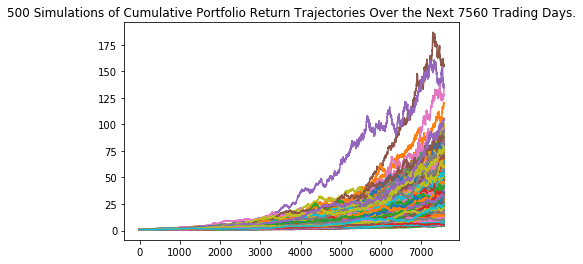

In [19]:
# Plot simulation outcomes
line_plot = MC_30.plot_simulation()
line_plot

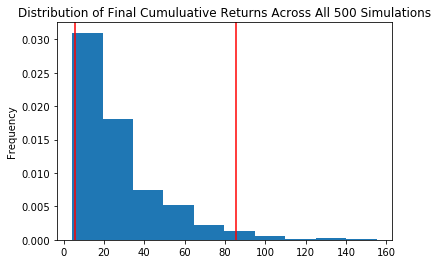

In [20]:
# Plot probability distribution and confidence intervals
dist_plot_30 = MC_30.plot_distribution()
dist_plot_30

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_sim_stats_30 = MC_30.summarize_cumulative_return()

# Print summary statistics
stock_sim_stats_30

count           500.000000
mean             28.008772
std              21.861089
min               4.188389
25%              12.968703
50%              20.904019
75%              35.418555
max             155.095274
95% CI Lower      5.662286
95% CI Upper     85.393502
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment_a = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stock_sim_stats_30[8]*initial_investment_a,2)
ci_upper = round(stock_sim_stats_30[9]*initial_investment_a,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_a:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $113,245.72 and $1,707,870.04


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_b = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_thirty = round(stock_sim_stats_30[8]*initial_investment_b,2)
ci_upper_thirty = round(stock_sim_stats_30[9]*initial_investment_b,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_b:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $113,245.72 and $1,707,870.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003393,0.986279,0.994404,0.997434,0.998314,1.013603,1.016650,1.012785,0.987414,0.983510,...,1.009924,1.000275,0.996232,0.999832,1.011809,0.996452,1.011041,1.003298,0.987462,1.001612
2,0.998895,1.000451,0.994069,1.007839,0.989916,1.004447,1.024957,1.013225,0.985110,0.985750,...,1.001613,0.979432,0.998399,1.003863,1.015377,1.001781,1.011108,1.004227,0.997558,1.008606
3,1.000336,0.995602,1.001596,1.000139,0.979967,1.006228,1.027411,1.006834,0.990233,0.992782,...,0.998631,0.978853,0.991510,1.015351,1.010978,0.994281,1.013570,1.016000,0.996555,1.005996
4,1.005275,0.997618,0.994109,1.011114,0.969015,1.005479,1.025864,1.016238,0.994978,0.985588,...,1.014738,0.972775,0.999552,1.018344,1.002708,1.005861,1.017252,1.003272,0.988588,1.015309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.718441,1.163421,1.470749,1.614642,2.478192,1.923822,1.716649,1.442241,1.375523,1.606566,...,1.733139,2.673024,0.891317,2.965744,2.061597,1.326799,3.070614,2.353833,1.652503,1.379931
1257,1.707787,1.153306,1.458481,1.600868,2.481316,1.941953,1.697388,1.437687,1.373403,1.624422,...,1.754950,2.679084,0.897259,2.966124,2.059960,1.329421,3.125097,2.343493,1.638157,1.398891
1258,1.709253,1.161877,1.459255,1.611071,2.497445,1.914917,1.693015,1.444734,1.373765,1.610594,...,1.756988,2.721550,0.897275,2.967938,2.059480,1.308930,3.086897,2.335497,1.628616,1.378094
1259,1.706036,1.167676,1.461427,1.611821,2.510885,1.910466,1.696481,1.442970,1.370651,1.619666,...,1.754442,2.761697,0.908240,2.993695,2.051648,1.317809,3.080250,2.355197,1.642492,1.389688


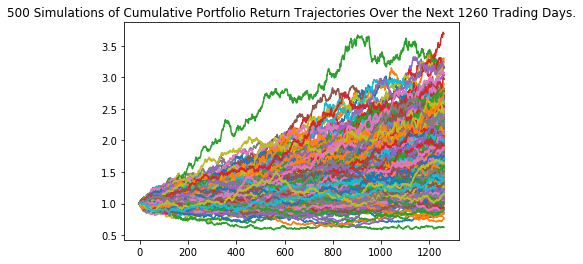

In [26]:
# Plot simulation outcomes
line_plot_five = MC_5.plot_simulation()
line_plot_five

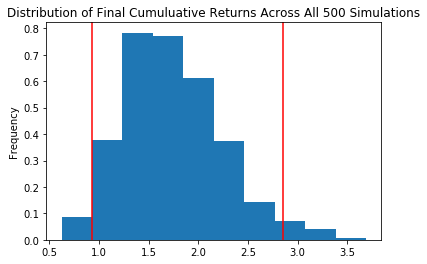

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5.plot_distribution()
dist_plot

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_sim_stats_5 = MC_5.summarize_cumulative_return()

# Print summary statistics
stock_sim_stats_5

count           500.000000
mean              1.745545
std               0.497632
min               0.624414
25%               1.375491
50%               1.695732
75%               2.043366
max               3.687870
95% CI Lower      0.932705
95% CI Upper      2.854906
Name: 1260, dtype: float64

In [29]:
# Set initial investment
initial_investment_c = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stock_sim_stats_5[8]*initial_investment_c,2)
ci_upper_five = round(stock_sim_stats_5[9]*initial_investment_c,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_c} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55962.3 and $171294.37


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [ ]:
# Plot simulation outcomes
line_plot_10 = MC_10.plot_simulation()
line_plot_10

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10.plot_distribution()
dist_plot_10

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_sim_stats_10 = MC_10.summarize_cumulative_return()

# Print summary statistics
stock_sim_stats_10

In [ ]:
# Set initial investment
# initial_investment = defined above.

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stock_sim_stats_10[8]*initial_investment_c,2)
ci_upper_ten = round(stock_sim_stats_10[9]*initial_investment_c,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_c} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")